In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install colour

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Imports
from __future__ import division
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import scipy, pylab
import seaborn as sns
import re
import glob
#sns.set(style='ticks', palette='Set2')
%matplotlib inline

#df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/res_data/dimers/py_AA.dat', header = None, delim_whitespace=True, error_bad_lines=False)

In [5]:
#pip install --upgrade seaborn

In [6]:
np.__version__

'1.21.6'

In [7]:
pd.__version__

'1.3.5'

In [8]:
pip show matplotlib

Name: matplotlib
Version: 3.2.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.8/dist-packages
Requires: pyparsing, kiwisolver, numpy, cycler, python-dateutil
Required-by: yellowbrick, wordcloud, seaborn, scikit-image, pycocotools, prophet, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, keras-vis, imgaug, fastai, descartes, datascience, daft, arviz


In [9]:
pip show matplotlib scipy

Name: matplotlib
Version: 3.2.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.8/dist-packages
Requires: python-dateutil, pyparsing, numpy, kiwisolver, cycler
Required-by: yellowbrick, wordcloud, seaborn, scikit-image, pycocotools, prophet, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, keras-vis, imgaug, fastai, descartes, datascience, daft, arviz
---
Name: scipy
Version: 1.7.3
Summary: SciPy: Scientific Library for Python
Home-page: https://www.scipy.org
Author: None
Author-email: None
License: BSD
Location: /usr/local/lib/python3.8/dist-packages
Requires: numpy
Required-by: yellowbrick, xgboost, xarray-einstats, statsmodels, sklearn-pandas, seaborn, scs, scikit-learn, scikit-image, qdldl, pymc, plotnine, osqp, mlxtend, missingno, matplotlib-venn, lightgbm, librosa, jaxlib, jax, imgaug, imbalanced-learn, hyper

In [10]:
sns.__version__

'0.11.2'

In [11]:
!pip install seaborn==0.11.0
import seaborn as sns
print(sns.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 283 kB 28.7 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


0.11.2


In [16]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2d_beta_zeta_GA_new.dat', header = None, delim_whitespace=True, error_bad_lines=False)

In [ ]:
f2 = open('/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2dfile_list.txt','r')
dffile= pd.read_csv(f2, header = None, delim_whitespace=True, error_bad_lines=False)
f2.name

In [17]:
print(df)
print(type(df[1].iloc[5]))

            0        1         2
0    142.5705  38.5744  hairpins
1    281.0795  55.1900  hairpins
2    101.7282  49.5604  hairpins
3     59.8472  63.0699  hairpins
4    296.4381  44.8293  hairpins
..        ...      ...       ...
347  284.6841  51.7468     stems
348  288.7241  49.9322     stems
349  320.2972  41.5520     stems
350  302.6805  67.2658     stems
351  293.6837  52.0663     stems

[352 rows x 3 columns]
<class 'numpy.float64'>


In [18]:
for filepath in glob.iglob('/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2d_*.dat'):

    a=re.split(';|\.|/| |,|_|\t+| +|\*|\n',filepath)
    print(a)
    xname=a[10]
    yname=a[11]
    dimername=a[12]
    print(xname,yname,dimername)


['', 'content', 'drive', 'MyDrive', 'Colab', 'Notebooks', 'res', 'data', 'dimers', '2d', 'epsi', 'gamma', 'AU', 'new', 'dat']
epsi gamma AU
['', 'content', 'drive', 'MyDrive', 'Colab', 'Notebooks', 'res', 'data', 'dimers', '2d', 'beta', 'zeta', 'GA', 'new', 'dat']
beta zeta GA


In [19]:
def make_Ramp( ramp_colors ): 
    from colour import Color
    from matplotlib.colors import LinearSegmentedColormap

    color_ramp = LinearSegmentedColormap.from_list( 'my_list', [ Color( c1 ).rgb for c1 in ramp_colors ] )
    plt.figure( figsize = (15,3))
    plt.imshow( [list(np.arange(0, len( ramp_colors ) , 0.1)) ] , interpolation='nearest', origin='lower', cmap= color_ramp )
    plt.xticks([])
    plt.yticks([])
    return color_ramp

#custom_ramp = make_Ramp( ['#0000ff','#00ffff','#ffff00','#ff0000' ] ) 
#custom_ramp = make_Ramp( ['#32369c','#00ff00','#ffff00','#ff0000' ] ) 
#custom_ramp = make_Ramp( ['#00f3ff','#68ff00','#ffbf00','#ff005c' ] ) 
#custom_ramp = make_Ramp( ['#00188f','#00bcf2','#00b294','#009e49','#bad80a', '#fff100', '#ff8c00','#e81123','#ec008c', '#68217a' ] ) 
custom_ramp = make_Ramp( ['#00188f','#00bcf2','#00b294','#009e49','#bad80a', '#fff100', '#ff8c00','#e81123','#ec008c' ] ) 



In [20]:
cd /content/drive/MyDrive/Colab Notebooks/res_data/dimers

/content/drive/MyDrive/Colab Notebooks/res_data/dimers


In [ ]:
!rm *.png

/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2d_epsi_gamma_AU_new.dat
['', 'content', 'drive', 'MyDrive', 'Colab', 'Notebooks', 'res', 'data', 'dimers', '2d', 'epsi', 'gamma', 'AU', 'new', 'dat']
epsi gamma AU
/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2d_beta_zeta_GA_new.dat
['', 'content', 'drive', 'MyDrive', 'Colab', 'Notebooks', 'res', 'data', 'dimers', '2d', 'beta', 'zeta', 'GA', 'new', 'dat']
beta zeta GA


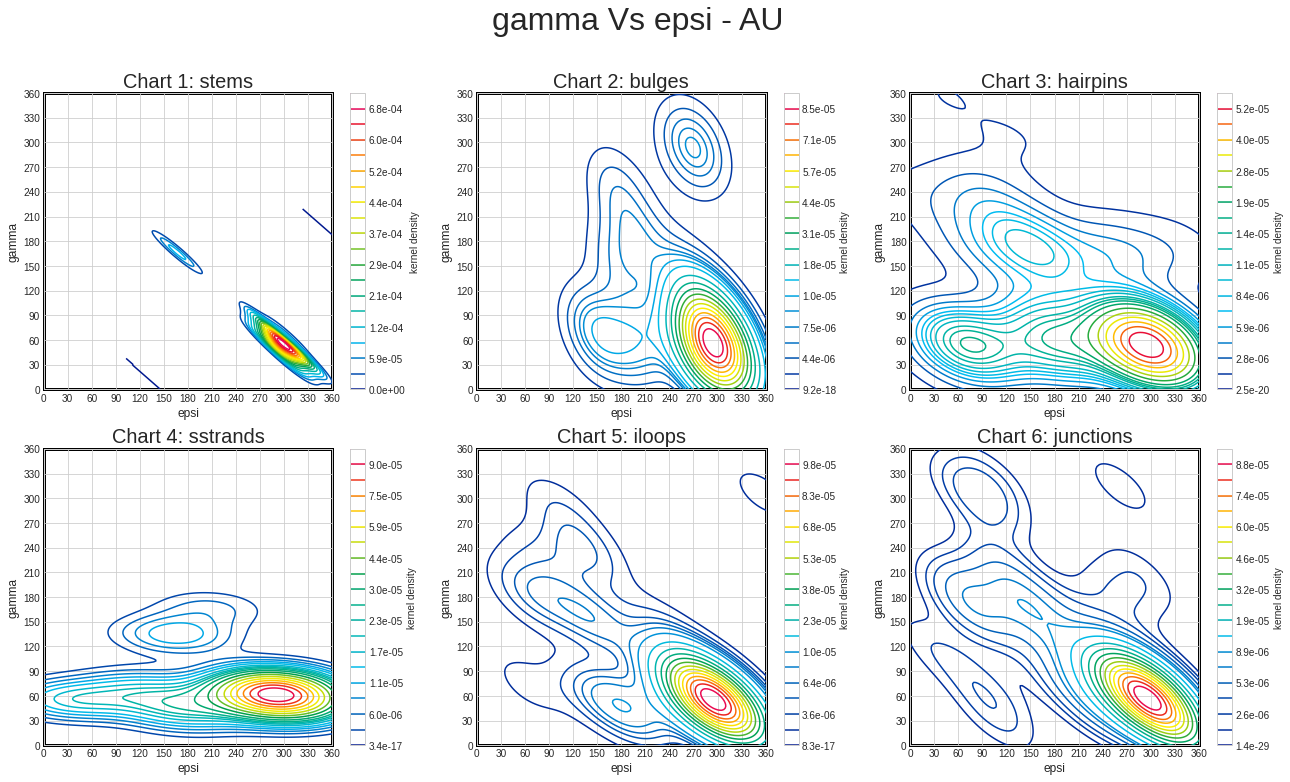

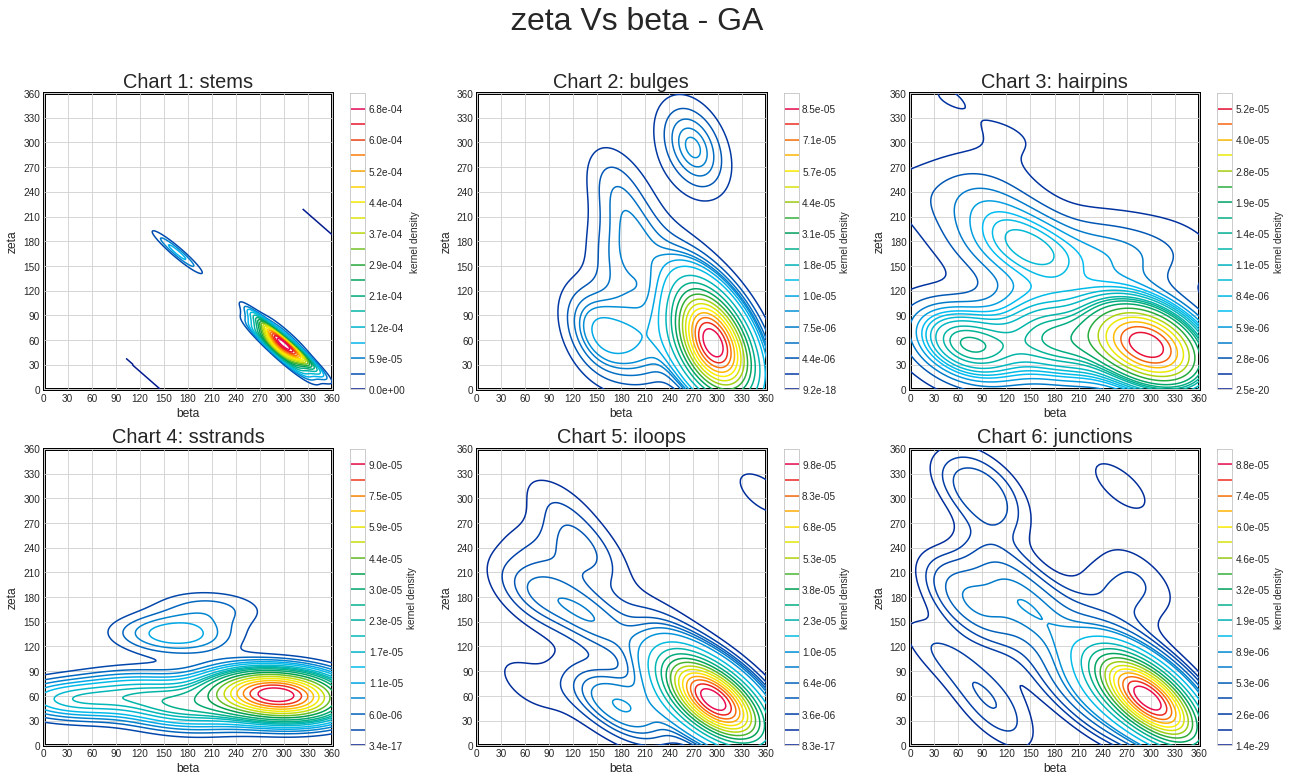

In [21]:

dimtypes = ["stems", "bulges", "hairpins", "sstrands", "iloops", "junctions", ]


for filepath in glob.iglob('/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2d_*.dat'):
#for filepath in glob.iglob('/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2dsample.dat'):
#/
  print(filepath)
  df= pd.read_csv(filepath, header = None, delim_whitespace=True,)

  a=re.split(';|\.|/| |,|_|\t+| +|\*|\n',filepath)
  print(a)
  xname=a[10]
  yname=a[11]
  dimername=a[12]
  print(xname,yname,dimername)

  plt.style.use("seaborn-whitegrid")
  plt.figure(figsize=(22,12))

  for i in range(0,6):
  #/ 
    plt.subplot(2,3,i+1)
    ax = sns.kdeplot(data=df, x=df.loc[df[2] == dimtypes[i], 0], y=df.loc[df[2] == dimtypes[i], 1], fill=False, thresh=0, levels=20, cmap=custom_ramp, common_norm=True, cbar=True, cbar_kws={'format': '%2.1e', 'label': 'kernel density'} )
    plt.title("Chart {}: {}".format(i+1, dimtypes[i]), size=20)
    plt.xlabel(str(xname), fontsize=12)
    plt.ylabel(str(yname), fontsize=12)
    plt.xlim([0, 360])
    plt.ylim([0, 360])
    ax.set_yticks(np.arange(0,361,30))
    ax.set_xticks(np.arange(0,361,30))
    ax.patch.set_edgecolor('black')  
    ax.patch.set_linewidth('3')  
    #plt.setp(ax, xlim=(0, 360), ylim=(0, 360))
  #/
  plt.suptitle(str(yname)+' Vs '+str(xname)+' - '+str(dimername), size=32)

  plt.savefig('/content/drive/MyDrive/Colab Notebooks/res_data/dimers/'+str(yname)+'_'+str(xname)+'_'+str(dimername), bbox_inches='tight', dpi=300 )
#/

#plt.suptitle("alpha gamma", size=32)

#plt.savefig('/content/drive/MyDrive/Colab Notebooks/res_data/dimers/alfa_gamma.png', bbox_inches='tight' )
  

In [24]:
import glob

dimtypes = ["stems", "bulges", "hairpins", "sstrands", "iloops", "junctions", ]

for filepath in glob.iglob('/content/drive/MyDrive/Colab Notebooks/res_data/dimers/*'):
    print(filepath)

/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2dsample.dat
/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2dfile_list.txt
/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2d_epsi_gamma_AU_new.dat
/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2d_beta_zeta_GA_new.dat
/content/drive/MyDrive/Colab Notebooks/res_data/dimers/o2d_alpha_gamma_CU_new.dat
/content/drive/MyDrive/Colab Notebooks/res_data/dimers/o2d_alpha_gamma_CU.dat
/content/drive/MyDrive/Colab Notebooks/res_data/dimers/zeta_beta_GA.png
/content/drive/MyDrive/Colab Notebooks/res_data/dimers/gamma_epsi_AU.png
/content/drive/MyDrive/Colab Notebooks/res_data/dimers/seaboarntest.ipynb


/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2d_epsi_gamma_AU_new.dat
['', 'content', 'drive', 'MyDrive', 'Colab', 'Notebooks', 'res', 'data', 'dimers', '2d', 'epsi', 'gamma', 'AU', 'new', 'dat']
epsi gamma AU
/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2d_beta_zeta_GA_new.dat
['', 'content', 'drive', 'MyDrive', 'Colab', 'Notebooks', 'res', 'data', 'dimers', '2d', 'beta', 'zeta', 'GA', 'new', 'dat']
beta zeta GA


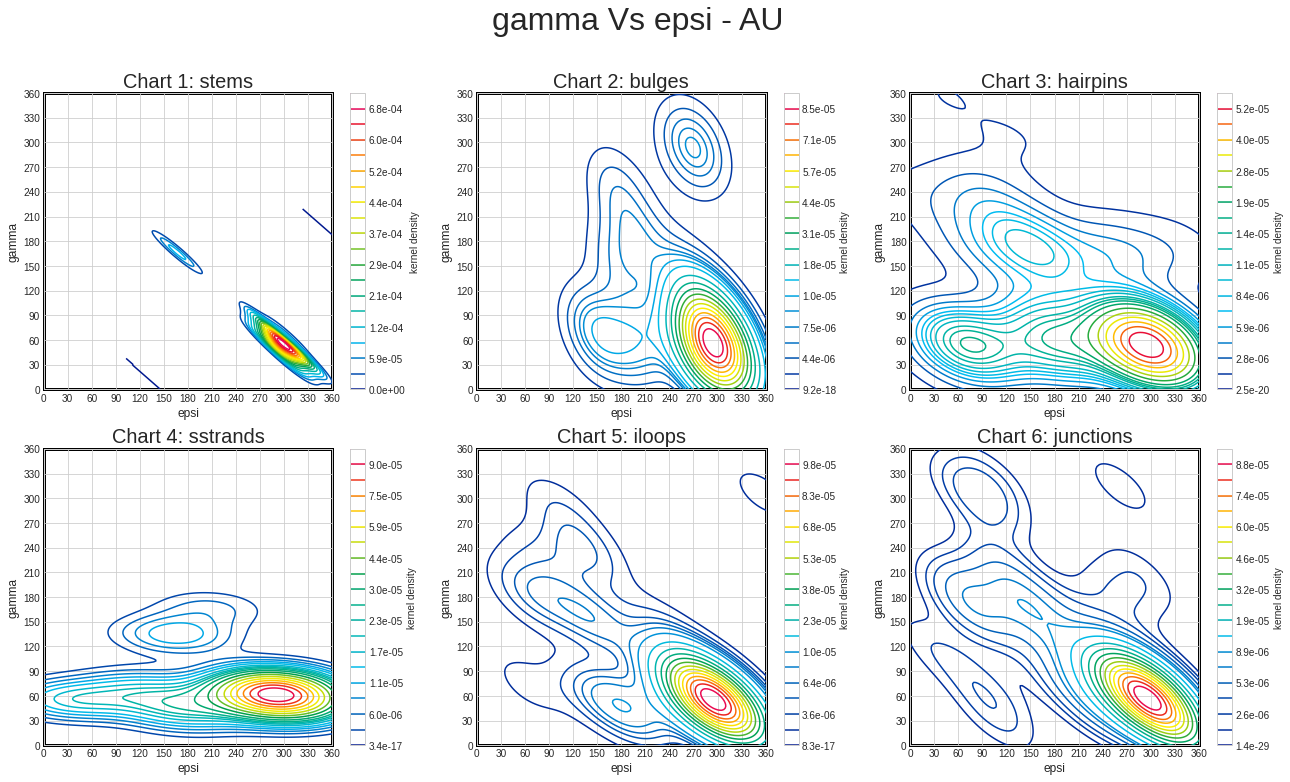

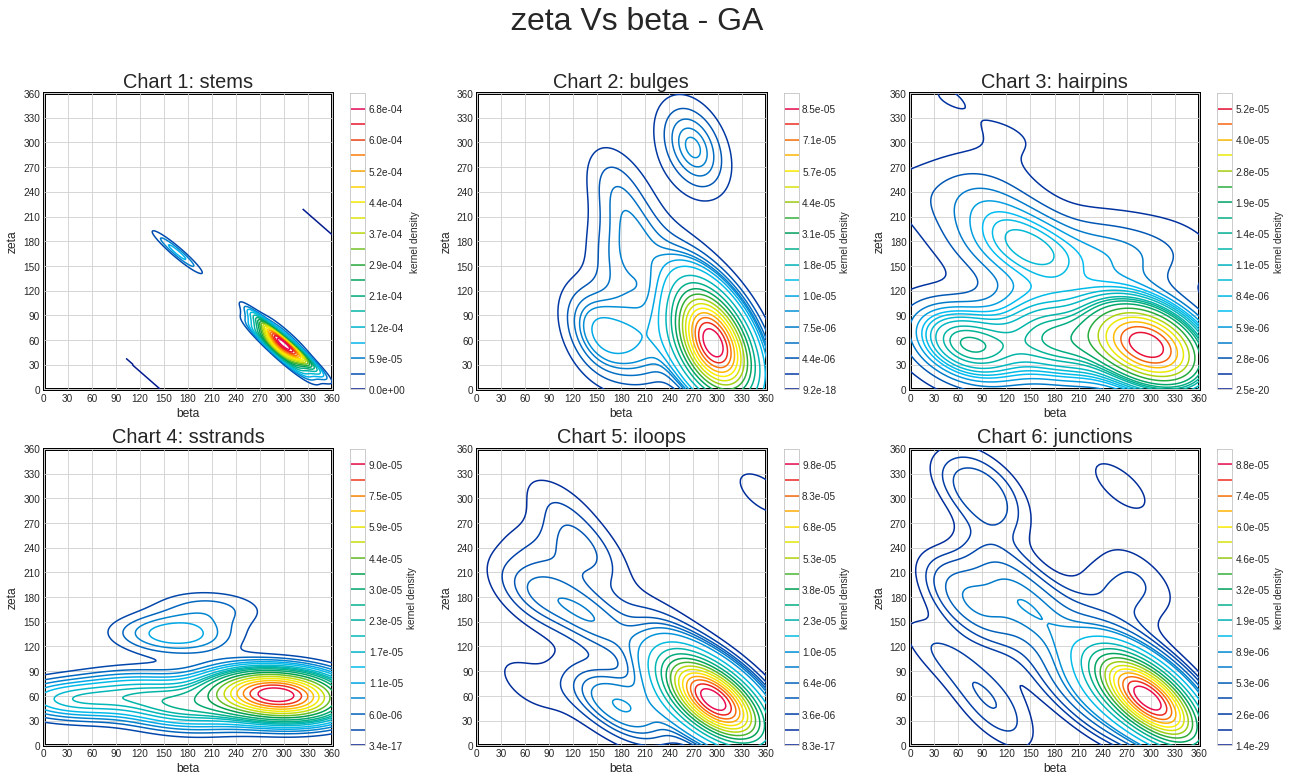

In [23]:

dimtypes = ["stems", "bulges", "hairpins", "sstrands", "iloops", "junctions", ]


for filepath in glob.iglob('/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2d_*.dat'):
#for filepath in glob.iglob('/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2dsample.dat'):
#/
  print(filepath)
  df= pd.read_csv(filepath, header = None, delim_whitespace=True,)

  a=re.split(';|\.|/| |,|_|\t+| +|\*|\n',filepath)
  print(a)
  xname=a[10]
  yname=a[11]
  dimername=a[12]
  print(xname,yname,dimername)

  plt.style.use("seaborn-whitegrid")
  plt.figure(figsize=(22,12))

  for i in range(0,6):
  #/ 
    plt.subplot(2,3,i+1)
    ax = sns.kdeplot(data=df, x=df.loc[df[2] == dimtypes[i], 0], y=df.loc[df[2] == dimtypes[i], 1], fill=False, thresh=0, levels=20, cmap=custom_ramp, common_norm=True, cbar=True, cbar_kws={'format': '%2.1e', 'label': 'kernel density'} )
    plt.title("Chart {}: {}".format(i+1, dimtypes[i]), size=20)
    plt.xlabel(str(xname), fontsize=12)
    plt.ylabel(str(yname), fontsize=12)
    plt.xlim([0, 360])
    plt.ylim([0, 360])
    ax.set_yticks(np.arange(0,361,30))
    ax.set_xticks(np.arange(0,361,30))
    ax.patch.set_edgecolor('black')  
    ax.patch.set_linewidth('3')  
    #plt.setp(ax, xlim=(0, 360), ylim=(0, 360))
  #/
  plt.suptitle(str(yname)+' Vs '+str(xname)+' - '+str(dimername), size=32)

  plt.savefig('/content/drive/MyDrive/Colab Notebooks/res_data/dimers/'+str(yname)+'_'+str(xname)+'_'+str(dimername), bbox_inches='tight' )
#/

#plt.suptitle("alpha gamma", size=32)

#plt.savefig('/content/drive/MyDrive/Colab Notebooks/res_data/dimers/alfa_gamma.png', bbox_inches='tight' )
  

/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2dsample.dat


Text(0.5, 0.98, 'alpha gamma')

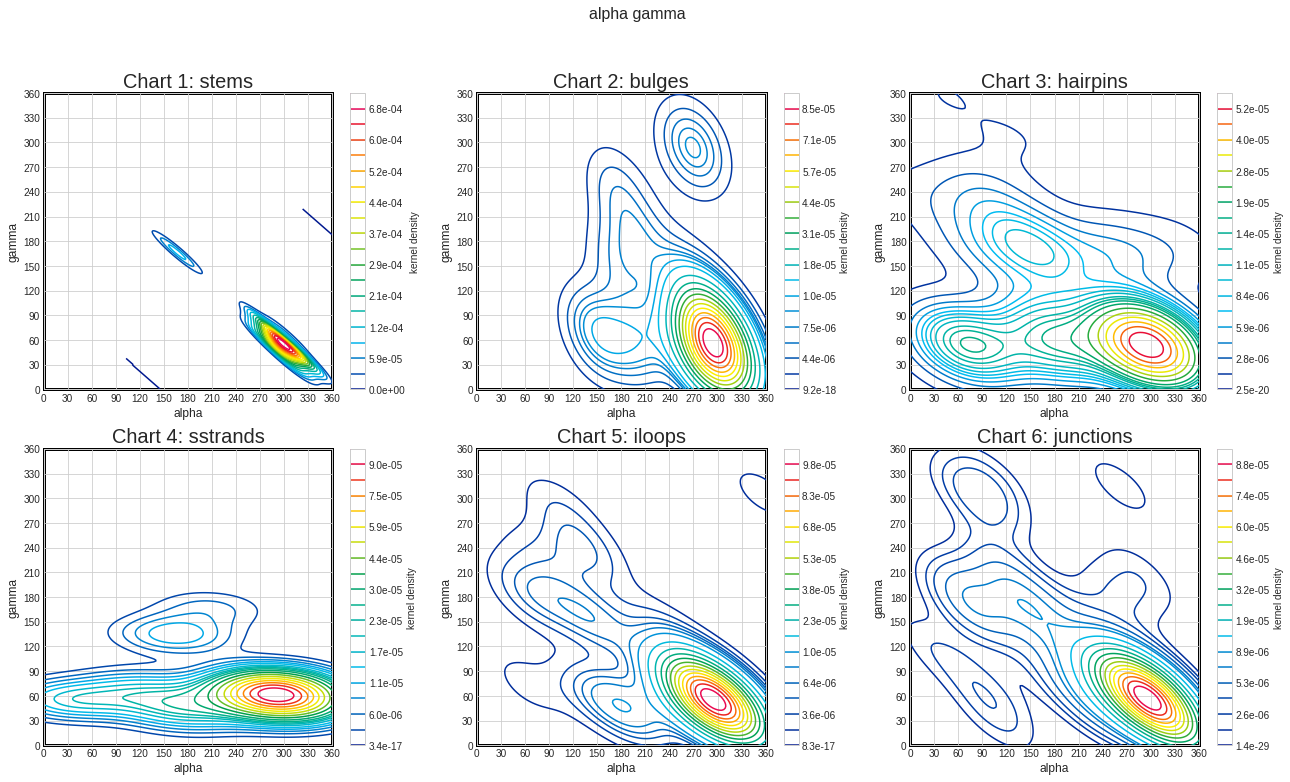

In [25]:

dimtypes = ["stems", "bulges", "hairpins", "sstrands", "iloops", "junctions", ]

#for filepath in glob.iglob('/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2d_alpha_gamma_CU_new.dat'):
for filepath in glob.iglob('/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2dsample.dat'):
    print(filepath)
    df= pd.read_csv(filepath, header = None, delim_whitespace=True,)
    
    plt.style.use("seaborn-whitegrid")
    plt.figure(figsize=(22,12))

    for i in range(0,6):
      plt.subplot(2,3,i+1)
      ax = sns.kdeplot(data=df, x=df.loc[df[2] == dimtypes[i], 0], y=df.loc[df[2] == dimtypes[i], 1], fill=False, thresh=0, levels=20, cmap=custom_ramp, common_norm=True, cbar=True, cbar_kws={'format': '%2.1e', 'label': 'kernel density'} )
      plt.title("Chart {}: {}".format(i+1, dimtypes[i]), size=20)
      plt.xlabel('alpha', fontsize=12)
      plt.ylabel('gamma', fontsize=12)
      plt.xlim([0, 360])
      plt.ylim([0, 360])
      ax.set_yticks(np.arange(0,361,30))
      ax.set_xticks(np.arange(0,361,30))
      ax.patch.set_edgecolor('black')  
      ax.patch.set_linewidth('3')  
      #plt.setp(ax, xlim=(0, 360), ylim=(0, 360))
       
        

plt.suptitle("alpha gamma", size=16)

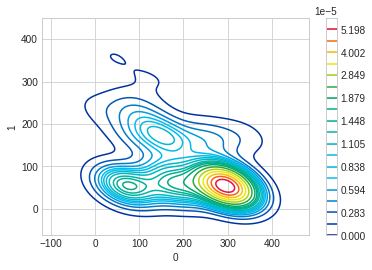

In [26]:
ax = sns.kdeplot(data=df, x=df.loc[df[2] == "hairpins", 0], y=df.loc[df[2] == "hairpins", 1], fill=False, thresh=0, levels=20, cmap=custom_ramp, common_norm=True, cbar=True, )

/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2dsample.dat


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 0.98, 'alpha gamma')

<Figure size 432x288 with 0 Axes>

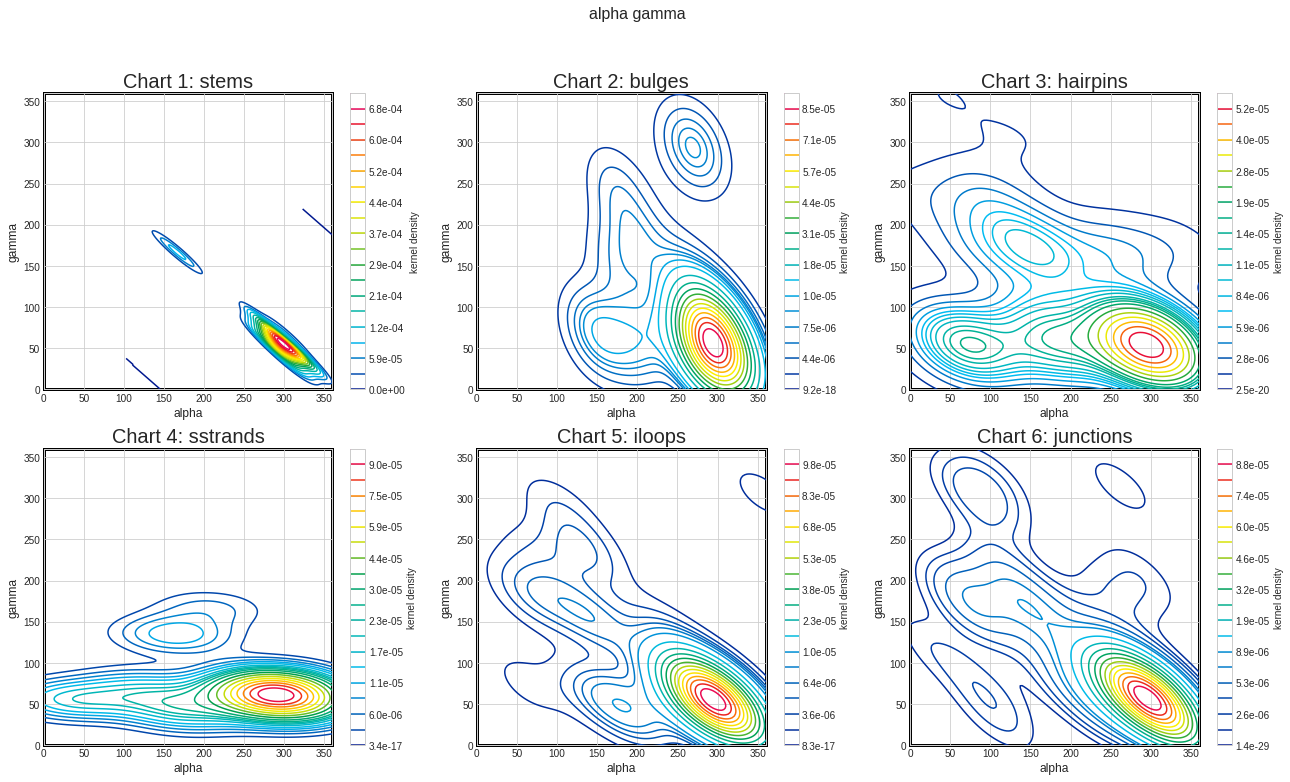

In [27]:
import glob

dimtypes = ["stems", "bulges", "hairpins", "sstrands", "iloops", "junctions", ]


fig=plt.figure()
#for filepath in glob.iglob('/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2d_alpha_gamma_CU_new.dat'):
for filepath in glob.iglob('/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2dsample.dat'):
    print(filepath)
    df= pd.read_csv(filepath, header = None, delim_whitespace=True, error_bad_lines=False)
    
    plt.style.use("seaborn-whitegrid")
    plt.figure(figsize=(22,12))

    for i in range(0,6):
      plt.subplot(2,3,i+1)
      ax = sns.kdeplot(data=df, x=df.loc[df[2] == dimtypes[i], 0], y=df.loc[df[2] == dimtypes[i], 1], fill=False, thresh=0, levels=20, cmap=custom_ramp, common_norm=True, cbar=True, cbar_kws={'format': '%2.1e', 'label': 'kernel density'} )
      plt.title("Chart {}: {}".format(i+1, dimtypes[i]), size=20)
      plt.xlabel('alpha', fontsize=12)
      plt.ylabel('gamma', fontsize=12)
      plt.xlim([0, 360])
      plt.ylim([0, 360])
      ax.patch.set_edgecolor('black')  
      ax.patch.set_linewidth('3')  
      #plt.setp(ax, xlim=(0, 360), ylim=(0, 360))

plt.suptitle("alpha gamma", size=16)

In [28]:
pd.__version__

'1.3.5'

In [29]:
#dffile=dffile.iloc[::1000, :]
#print(dffile)

NameError: ignored

In [32]:
#f = open('/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2d_alpha_gamma_CU_new.dat','r')
#df= pd.read_csv(f, header = None, delim_whitespace=True, error_bad_lines=False)
#f.name

In [37]:
#load filenames 
f2 = open('/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2dfile_list.txt','r')
dffile= pd.read_csv(f2, header = None, delim_whitespace=True, error_bad_lines=False)
f2.name


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


'/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2dfile_list.txt'

In [40]:
import glob


for file in glob.iglob('/content/drive/MyDrive/Colab Notebooks/res_data/dimers/*'):
    print(filepath)



for file in dffile[0]:
#/
  #read the file and put into data frames

  df= pd.read_csv(file, header = None, delim_whitespace=True, error_bad_lines=False)

  print(file)
  a=re.split(';|\.| |,|_|\t+| +|\*|\n',file)
  xname=a[2]
  yname=a[3]
  dimername=a[4]
  print(xname,yname,dimername)





/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2dsample.dat
/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2dsample.dat
/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2dsample.dat
/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2dsample.dat
/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2dsample.dat
/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2dsample.dat
/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2dsample.dat
/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2dsample.dat
/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2dsample.dat


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


FileNotFoundError: ignored

In [41]:
a='Beautiful_abs,     asd       is    ; better*than\nugly.dat'
import re
re.split('; |\.|_|\t+| +|\*|\n',a)
#

['Beautiful', 'abs,', 'asd', 'is', '', 'better', 'than', 'ugly', 'dat']

In [42]:
import re
a=re.split('; |,|_|\t+| +|\*|\n',f2.name)
a
#print(a[1], a[1])

['/content/drive/MyDrive/Colab',
 'Notebooks/res',
 'data/dimers/2dfile',
 'list.txt']

In [44]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/res_data/dimers/2dsample.dat', header = None, delim_whitespace=True, error_bad_lines=False)

In [ ]:
#https://holypython.com/python-visualization-tutorial/creating-multiple-charts/

In [45]:
df.loc[df[2] == "bulges", 1]

185     82.9294
186    246.0211
187     67.8984
188     47.6528
189     57.7258
190     52.5916
191     52.0690
192     54.1280
193     60.6627
194     52.2307
195     70.9206
196     50.4047
197     67.3688
198     50.9088
199     53.8344
200     89.9931
201     63.5165
202     36.5565
203    182.9701
204    292.0175
205     69.9557
206     38.5534
207     23.7855
208     70.3421
209     63.8611
210     52.1872
211    295.6128
212     49.4270
213     45.7527
214     47.9709
215    136.2023
216    154.3164
Name: 1, dtype: float64

In [47]:
!pip install colour

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[0.0, 360.0, 0.0, 360.0]

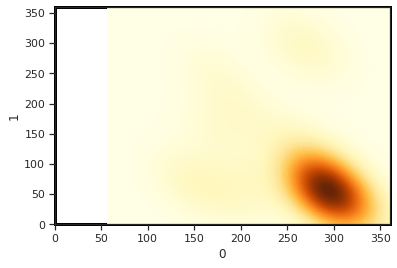

In [46]:
ax=sns.kdeplot(
    data=df, x=df.loc[df[2] == "bulges", 0], y=df.loc[df[2] == "bulges", 1],
    fill=True, thresh=0, levels=100, cmap="YlOrBr",
)

ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('3')  

custom_xlim = (0, 360)
custom_ylim = (0, 360)

plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)

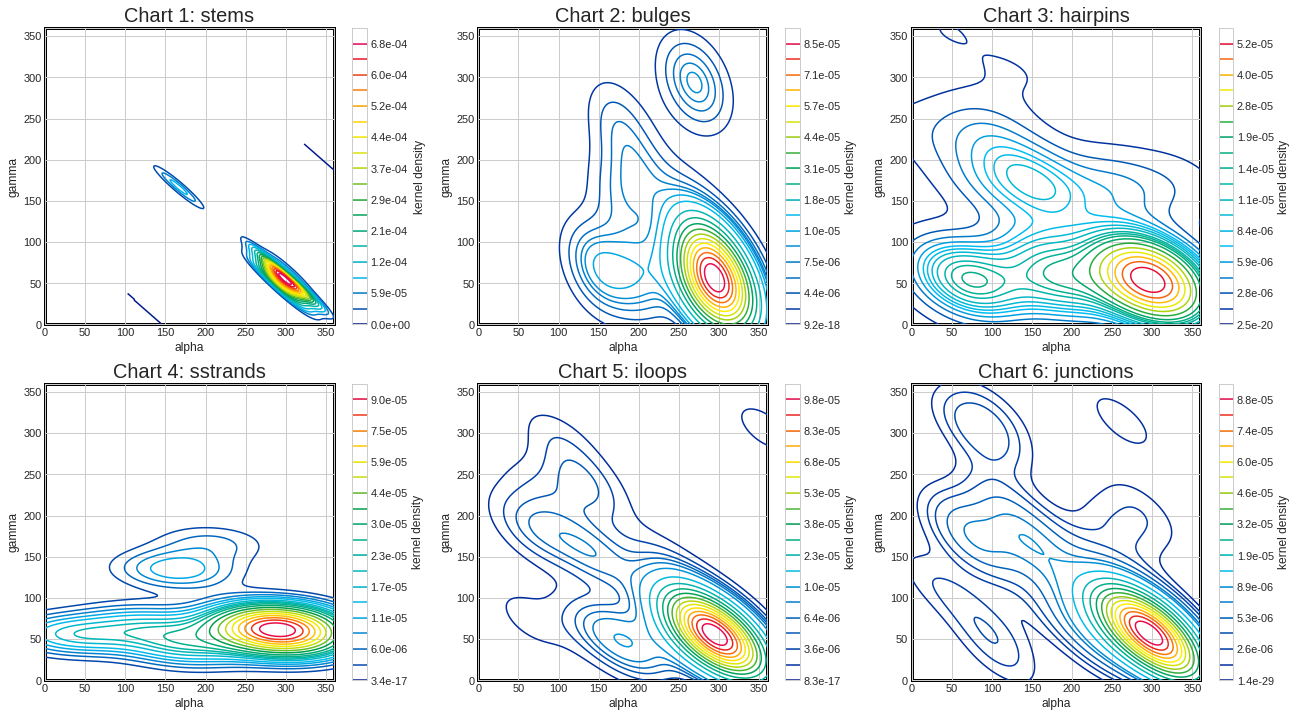

In [49]:
import matplotlib.pyplot as plt
import random
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(22,12))

color=['red', 'blue', 'lightgreen', 'orange', 'green', 'black']

#cmap = ["viridis", "cividis", "inferno", "viridis_r", "autumn", "winter" ]
cmap = ["Reds", "Oranges", "Greens", "Blues", "RdPu", "Purples"]

dimtypes = ["stems", "bulges", "hairpins", "sstrands", "iloops", "junctions", ]


for i in range(0,6):
  plt.subplot(2,3,i+1)
  ax = sns.kdeplot(data=df, x=df.loc[df[2] == dimtypes[i], 0], y=df.loc[df[2] == dimtypes[i], 1], fill=False, thresh=0, levels=20, cmap=custom_ramp, common_norm=True, cbar=True, cbar_kws={'format': '%2.1e', 'label': 'kernel density'} )
  plt.title("Chart {}: {}".format(i+1, dimtypes[i]), size=20)
  plt.xlabel('alpha', fontsize=12)
  plt.ylabel('gamma', fontsize=12)
  plt.xlim([0, 360])
  plt.ylim([0, 360])
  ax.patch.set_edgecolor('black')  
  ax.patch.set_linewidth('3')  
  #plt.setp(ax, xlim=(0, 360), ylim=(0, 360))


  



Text(0, 0.5, 'ylabel')

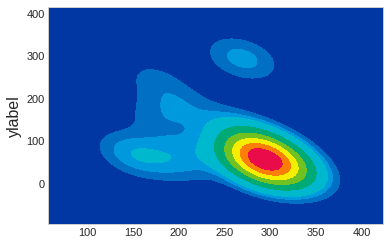

In [50]:
#plt.subplot(2,3,i+1)
sns.kdeplot(data=df, x=df.loc[df[2] == "bulges", 0], y=df.loc[df[2] == "bulges", 1], fill=True, thresh=0, levels=10, cmap=custom_ramp)
plt.xlabel("", fontsize=18)
plt.ylabel('ylabel', fontsize=16)
#plt.title("Chart {}: {}".format(i+1, dimtypes[i]), size=20)


2
terrain


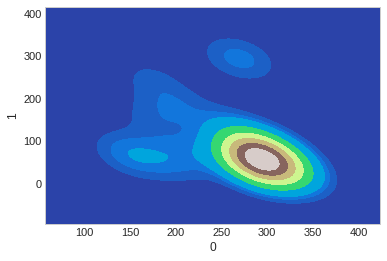

coolwarm


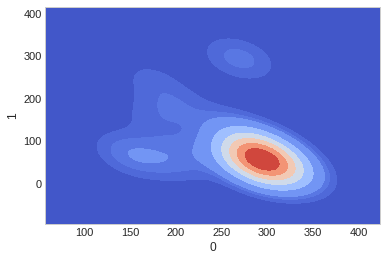

In [51]:
#plt.subplot(2,3,i+1)

#cmap = ['flag', 'prism', 'ocean', 'gist_earth', 'terrain',
#                      'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap',
#                      'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 
#                      'turbo', 'nipy_spectral', 'gist_ncar','Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
#                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
#                      'tab20c', 'twilight', 'twilight_shifted', 'hsv','PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
#                      'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic', 'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
#                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
#                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper', 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn', 'viridis', 'plasma', 'inferno', 'magma', 'cividis', "Reds", "Oranges", "Greens", "Blues", "RdPu", "Purples"]

cmap = ['terrain', 'coolwarm']
#dimtypes = ["stems", "bulges", "hairpins", "sstrands", "iloops", "junctions", ]
print(len(cmap))

for i in range(0,len(cmap)):
#
  try:
    sns.kdeplot(data=df, x=df.loc[df[2] == "bulges", 0], y=df.loc[df[2] == "bulges", 1], fill=True, thresh=0, levels=10, cmap=cmap[i])
    print(cmap[i])
    plt.show()
  except ValueError:
    continue   

#
#plt.title("Chart {}: {}".format(i+1, dimtypes[i]), size=20)
#plt.savefig("test.png")

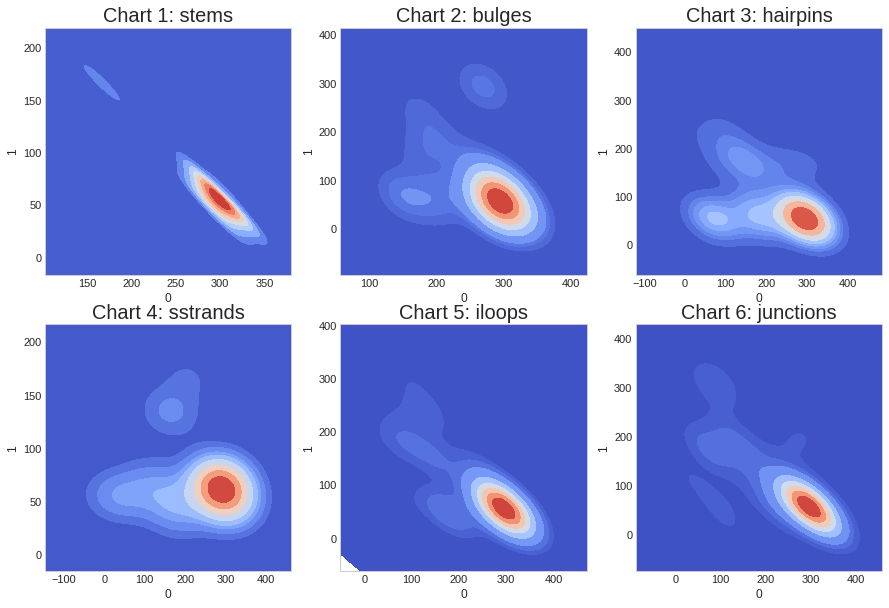

In [52]:
import matplotlib.pyplot as plt
import random
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(15,10))

color=['red', 'blue', 'lightgreen', 'orange', 'green', 'black']

#cmap = ["viridis", "cividis", "inferno", "viridis_r", "autumn", "winter" ]
cmap = ["Reds", "Oranges", "Greens", "Blues", "RdPu", "Purples"]

dimtypes = ["stems", "bulges", "hairpins", "sstrands", "iloops", "junctions", ]

for i in range(0,6):
  plt.subplot(2,3,i+1)
  sns.kdeplot(data=df, x=df.loc[df[2] == dimtypes[i], 0], y=df.loc[df[2] == dimtypes[i], 1], fill=True, thresh=0, levels=10, cmap="coolwarm")
  plt.title("Chart {}: {}".format(i+1, dimtypes[i]), size=20)

  

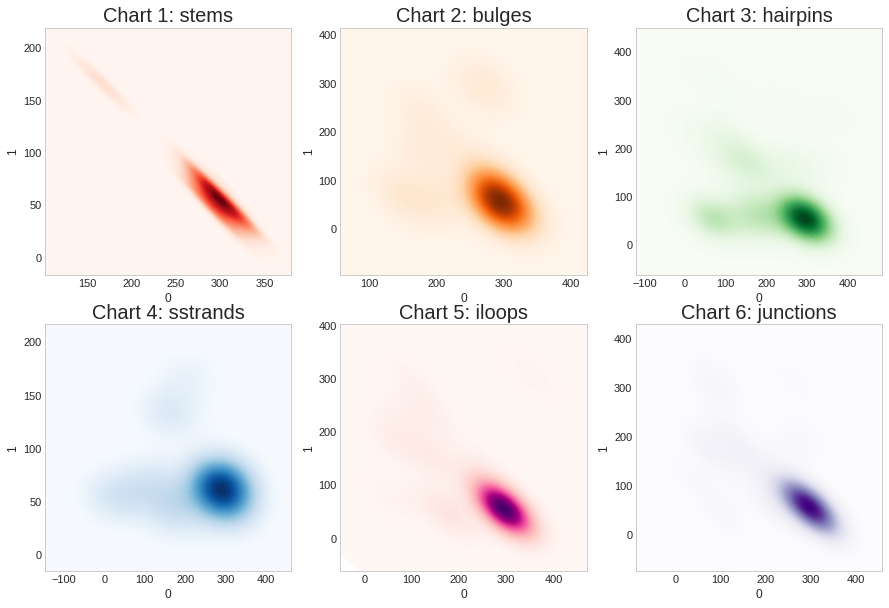

In [53]:
import matplotlib.pyplot as plt
import random
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(15,10))

color=['red', 'blue', 'lightgreen', 'orange', 'green', 'black']

#cmap = ["viridis", "cividis", "inferno", "viridis_r", "autumn", "winter" ]
cmap = ["Reds", "Oranges", "Greens", "Blues", "RdPu", "Purples"]

dimtypes = ["stems", "bulges", "hairpins", "sstrands", "iloops", "junctions", ]

for i in range(0,6):
  plt.subplot(2,3,i+1)
  sns.kdeplot(data=df, x=df.loc[df[2] == dimtypes[i], 0], y=df.loc[df[2] == dimtypes[i], 1], fill=True, thresh=0, levels=100, cmap=cmap[i])
  plt.title("Chart {}: {}".format(i+1, dimtypes[i]), size=20)


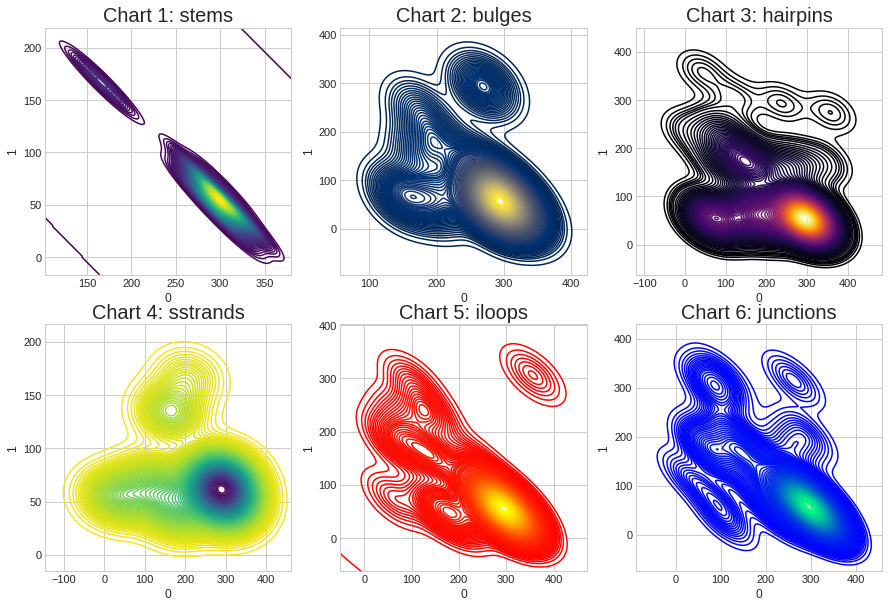

In [57]:
import matplotlib.pyplot as plt
import random
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(15,10))

color=['red', 'blue', 'lightgreen', 'orange', 'green', 'black']

cmap = ["viridis", "cividis", "inferno", "viridis_r", "autumn", "winter" ]

dimtypes = ["stems", "bulges", "hairpins", "sstrands", "iloops", "junctions", ]

for i in range(0,6):
  plt.subplot(2,3,i+1)
  sns.kdeplot(data=df, x=df.loc[df[2] == dimtypes[i], 0], y=df.loc[df[2] == dimtypes[i], 1], fill=False, thresh=0, levels=100, cmap=cmap[i])
  plt.title("Chart {}: {}".format(i+1, dimtypes[i]), size=20)









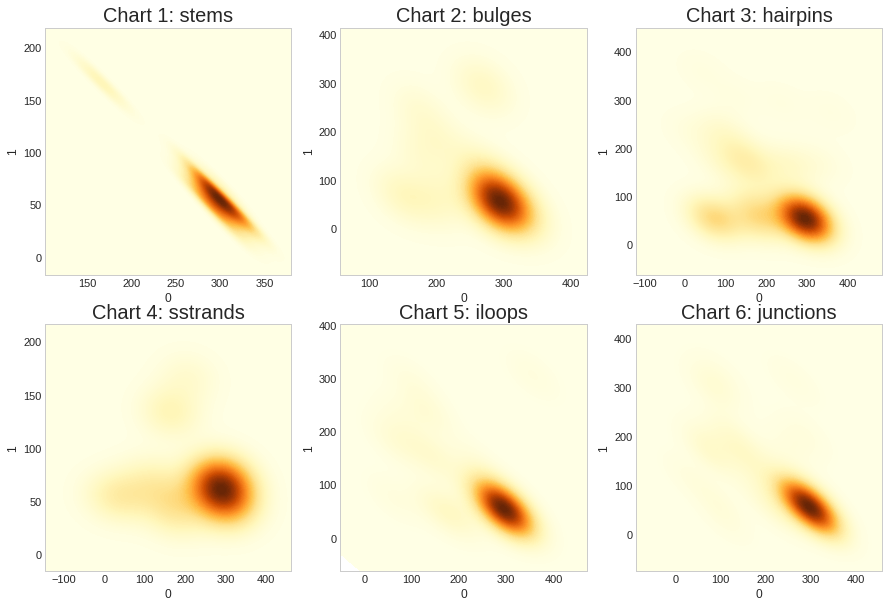

In [56]:
import matplotlib.pyplot as plt
import random
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(15,10))

color=['red', 'blue', 'lightgreen', 'orange', 'green', 'black']

cmap = ["YlOrBr", "viridis", "cividis", "inferno", "viridis_r", "autumn", "winter" ]

dimtypes = ["stems", "bulges", "hairpins", "sstrands", "iloops", "junctions", ]

for i in range(0,6):
  plt.subplot(2,3,i+1)
  sns.kdeplot(data=df, x=df.loc[df[2] == dimtypes[i], 0], y=df.loc[df[2] == dimtypes[i], 1], fill=True, thresh=0, levels=100, cmap=cmap[0])
  plt.title("Chart {}: {}".format(i+1, dimtypes[i]), size=20)




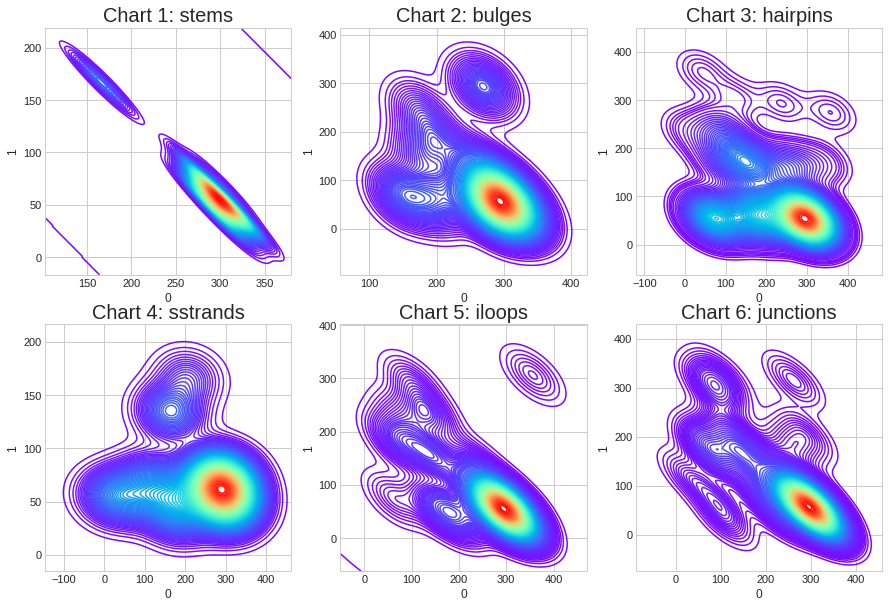

In [58]:
import matplotlib.pyplot as plt
import random
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(15,10))

color=['red', 'blue', 'lightgreen', 'orange', 'green', 'black']

cmap = ["rainbow", "YlOrBr", "viridis", "cividis", "inferno", "viridis_r", "autumn", "winter" ]

dimtypes = ["stems", "bulges", "hairpins", "sstrands", "iloops", "junctions", ]

for i in range(0,6):
  plt.subplot(2,3,i+1)
  sns.kdeplot(data=df, x=df.loc[df[2] == dimtypes[i], 0], y=df.loc[df[2] == dimtypes[i], 1], fill=False, thresh=0, levels=100, cmap=cmap[0])
  plt.title("Chart {}: {}".format(i+1, dimtypes[i]), size=20)


Text(0.5, 1.0, 'Chart 5: junctions')

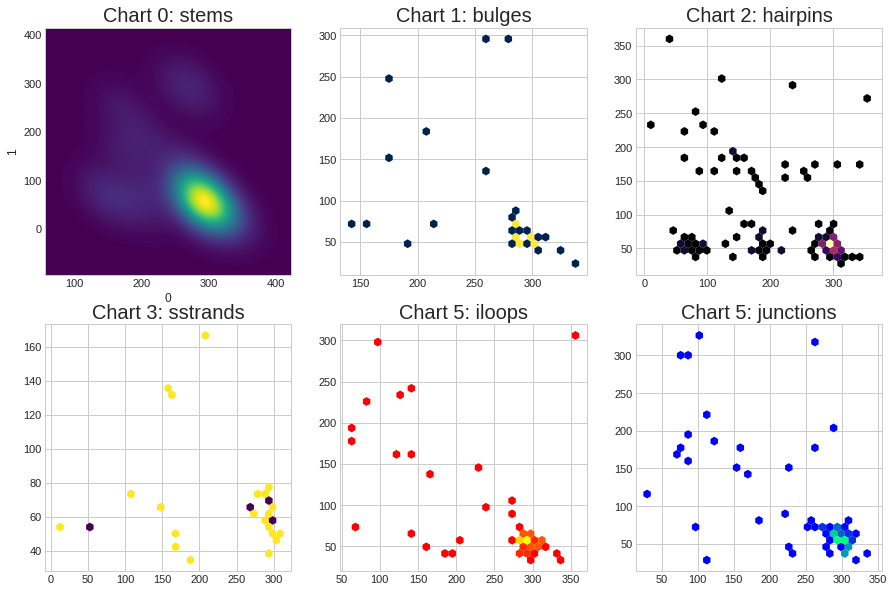

In [55]:
import matplotlib.pyplot as plt
import random
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(15,10))

color=['red', 'blue', 'lightgreen', 'orange', 'green', 'black']

cmap = ["viridis", "cividis", "inferno", "viridis_r", "autumn", "winter" ]

dimtypes = ["stems", "bulges", "hairpins", "sstrands", "iloops", "junctions", ]


plt.subplot(2,3,1)
sns.kdeplot(data=df, x=df.loc[df[2] == "bulges", 0], y=df.loc[df[2] == "bulges", 1], fill=True, thresh=0, levels=100, cmap=cmap[0])
plt.title("Chart {}: {}".format(0, dimtypes[0]), size=20)

plt.subplot(2,3,2)
plt.hexbin(x=df.loc[df[2] == "bulges", 0], y=df.loc[df[2] == "bulges", 1] ,gridsize=30, mincnt=1, edgecolors="none", cmap=cmap[1])
plt.title("Chart {}: {}".format(1, dimtypes[1]), size=20)

plt.subplot(2,3,3)
plt.hexbin(x=df.loc[df[2] == "hairpins", 0], y=df.loc[df[2] == "hairpins", 1] ,gridsize=30, mincnt=1, edgecolors="none", cmap=cmap[2])
plt.title("Chart {}: {}".format(2, dimtypes[2]), size=20)

plt.subplot(2,3,4)
plt.hexbin(x=df.loc[df[2] == "sstrands", 0], y=df.loc[df[2] == "sstrands", 1] ,gridsize=30, mincnt=1, edgecolors="none", cmap=cmap[3])
plt.title("Chart {}: {}".format(3, dimtypes[3]), size=20)

plt.subplot(2,3,5)
plt.hexbin(x=df.loc[df[2] == "iloops", 0], y=df.loc[df[2] == "iloops", 1] ,gridsize=30, mincnt=1, edgecolors="none", cmap=cmap[4])
plt.title("Chart {}: {}".format(5, dimtypes[4]), size=20)

plt.subplot(2,3,6)
plt.hexbin(x=df.loc[df[2] == "junctions", 0], y=df.loc[df[2] == "junctions", 1] ,gridsize=30, mincnt=1, edgecolors="none", cmap=cmap[5])
plt.title("Chart {}: {}".format(5, dimtypes[5]), size=20)









In [ ]:
df.info

<bound method DataFrame.info of             0         1       2
0    142.5705   38.5744     aaa
1    281.0795   55.1900     aaa
2    101.7282   49.5604     aaa
3     59.8472   63.0699     aaa
4    296.4381   44.8293     aaa
..        ...       ...     ...
245  223.4861  221.0437  bulges
246  274.3889   67.7487  bulges
247  302.0352  319.6013  bulges
248  304.6205   44.4922  bulges
249  300.0075   67.0870  bulges

[250 rows x 3 columns]>

TypeError: ignored

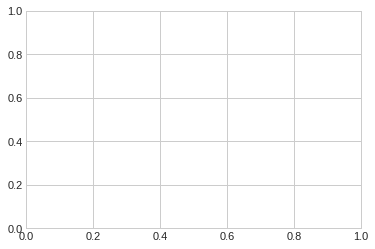

In [59]:
sns.kdeplot(
    data=df, x=df[1], y=df[2], hue=df[0], fill=True,
)

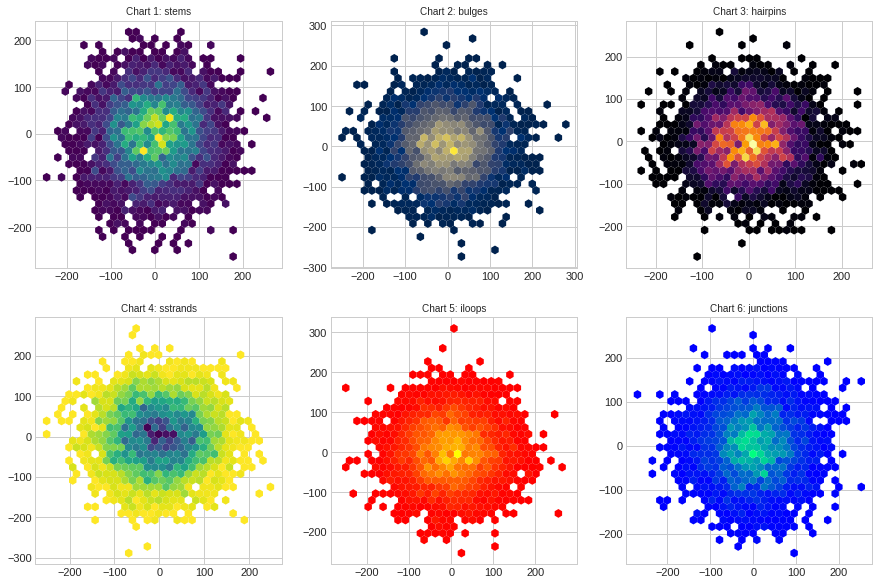

In [60]:
import matplotlib.pyplot as plt
import random
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(15,10))

color=['red', 'blue', 'lightgreen', 'orange', 'green', 'black']

cmap = ["viridis", "cividis", "inferno", "viridis_r", "autumn", "winter" ]

dimtypes = ["stems", "bulges", "hairpins", "sstrands", "iloops", "junctions", ]

n = 70
for i in range(0,6):
    plt.subplot(2,3,i+1)
    col = color[random.randint(0,5)]
    
    x = np.ceil(np.random.standard_normal((n,n))*n)
    y = np.ceil(np.random.standard_normal((n,n))*n)
    plt.hexbin(x.flatten(),y.flatten(),gridsize=30, mincnt=1, edgecolors="none", cmap=cmap[i])

    plt.title("Chart {}: {}".format(i+1, dimtypes[i]), size=10)

TypeError: ignored

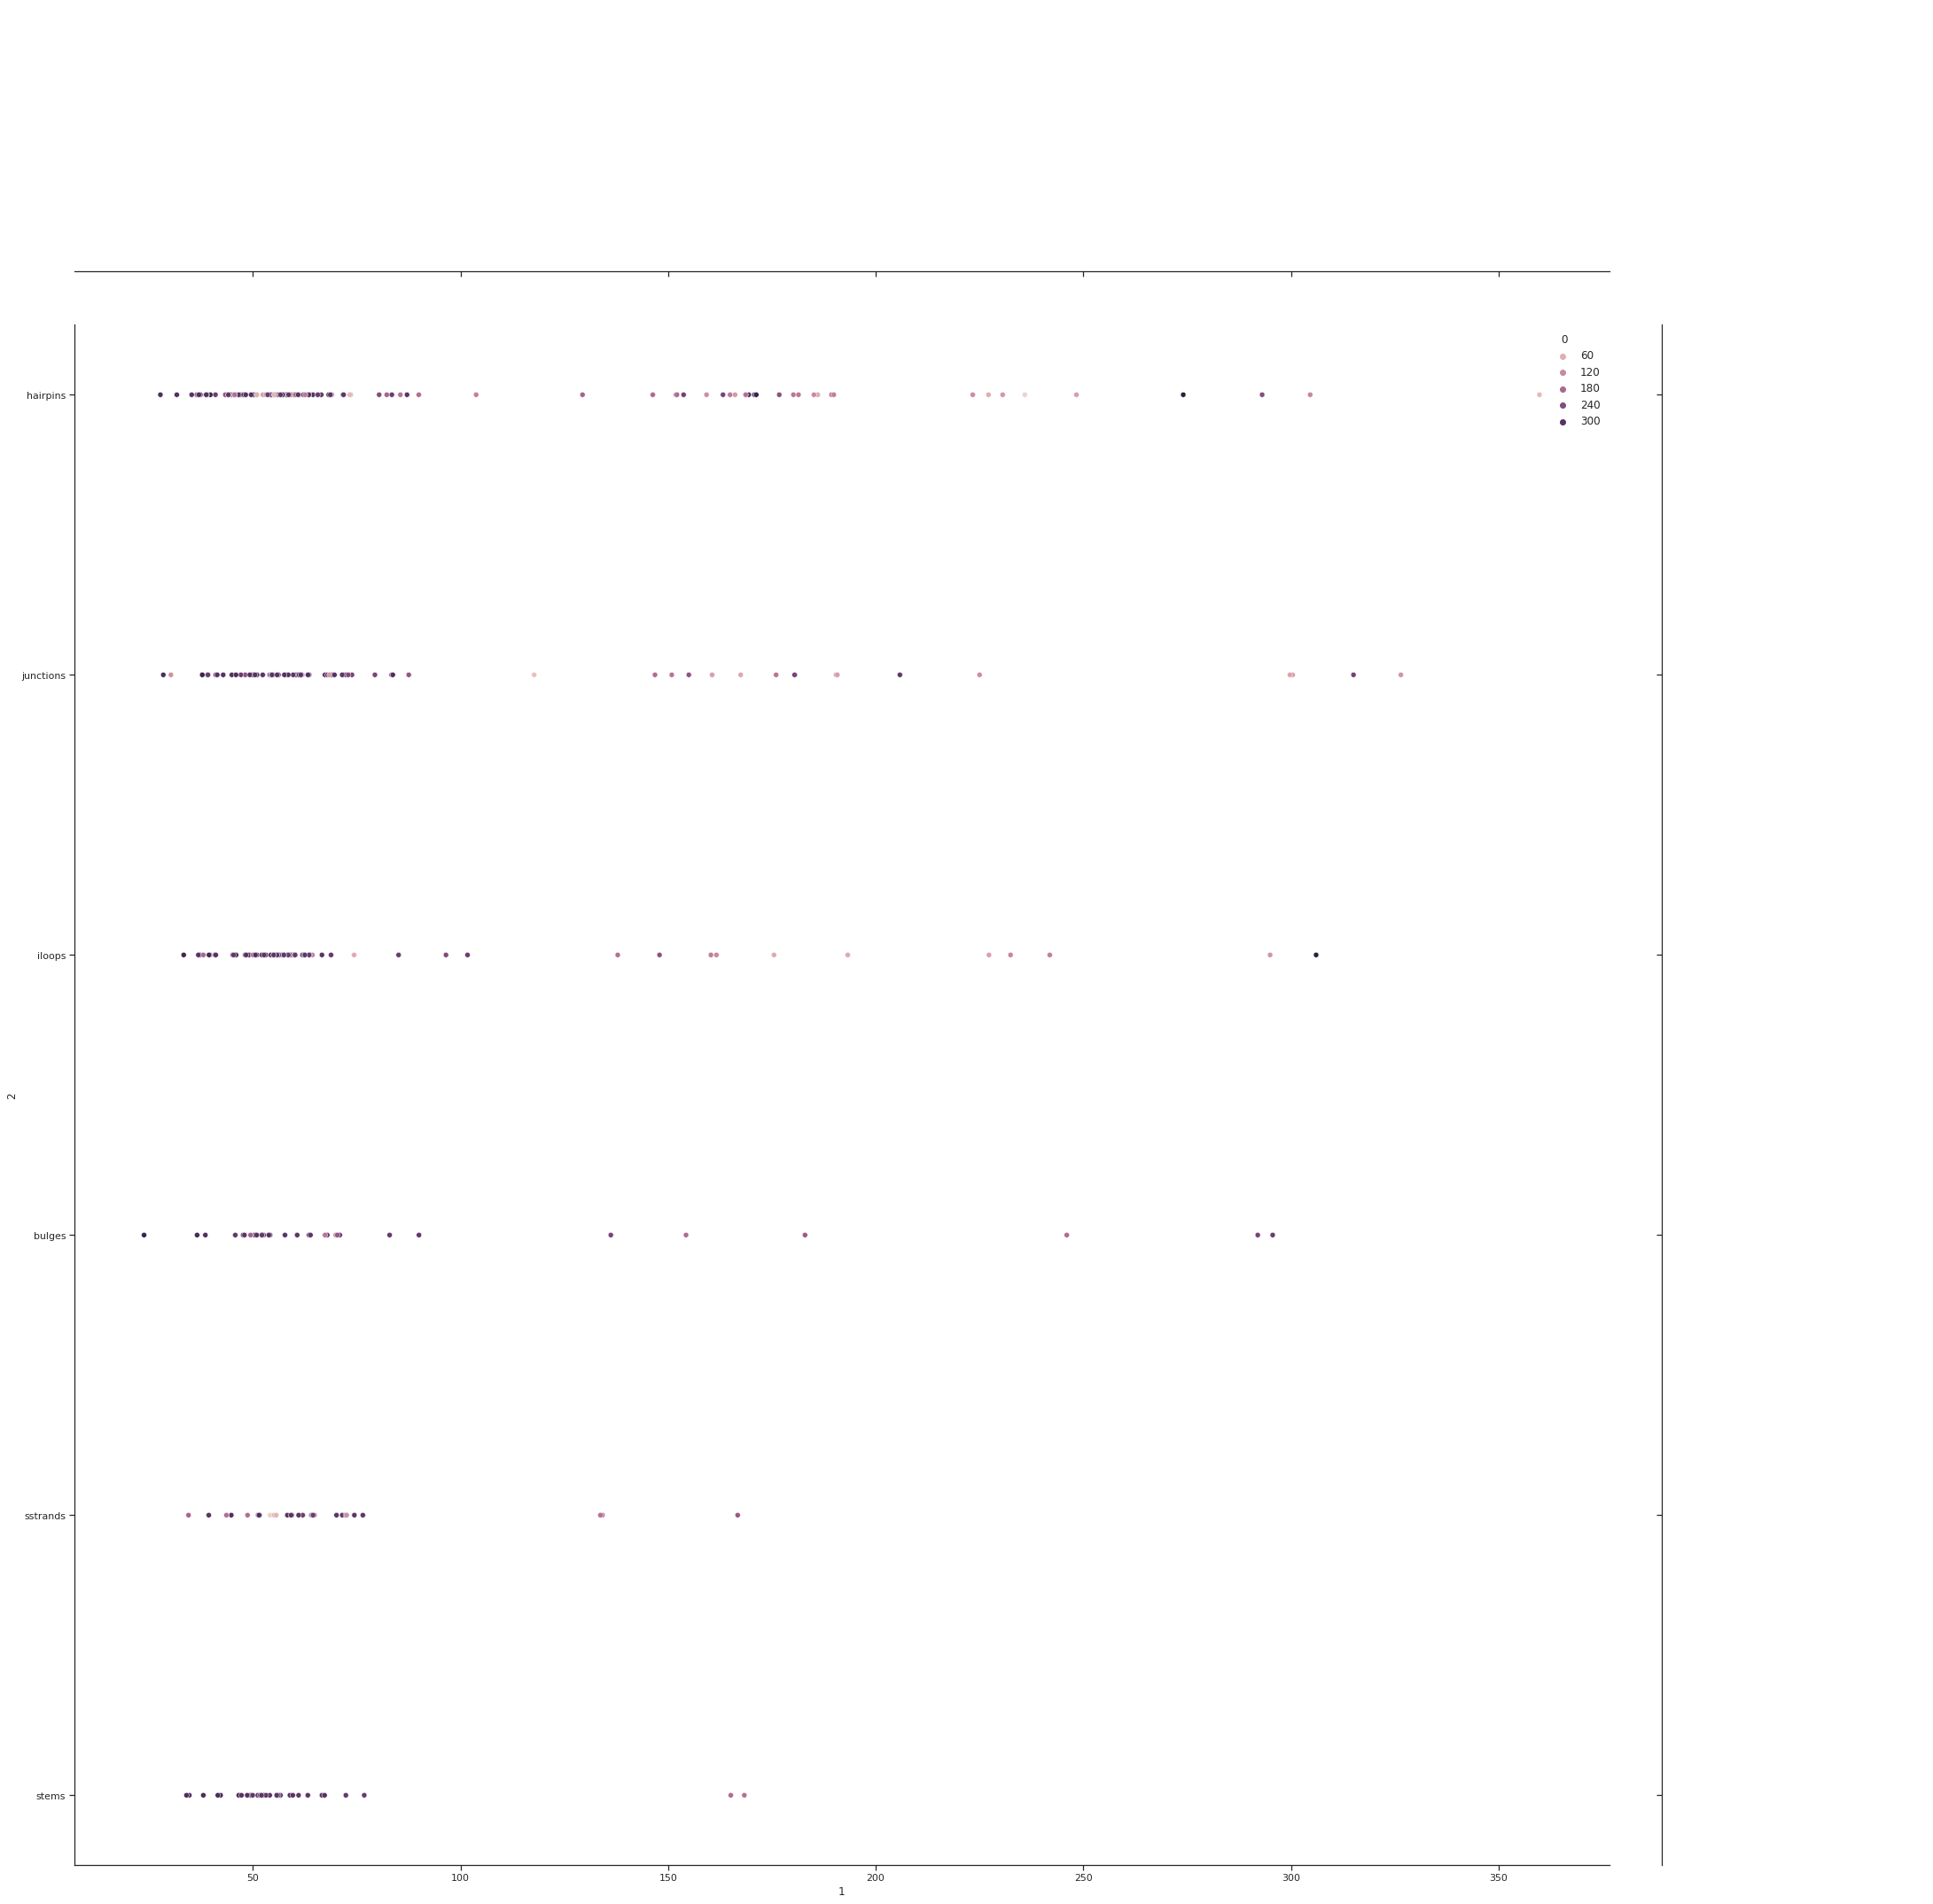

In [61]:
import seaborn as sns
sns.set_theme(style="ticks")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(data=df, kind="scatter", x=df[1], y=df[2] , hue=0, height=30, )

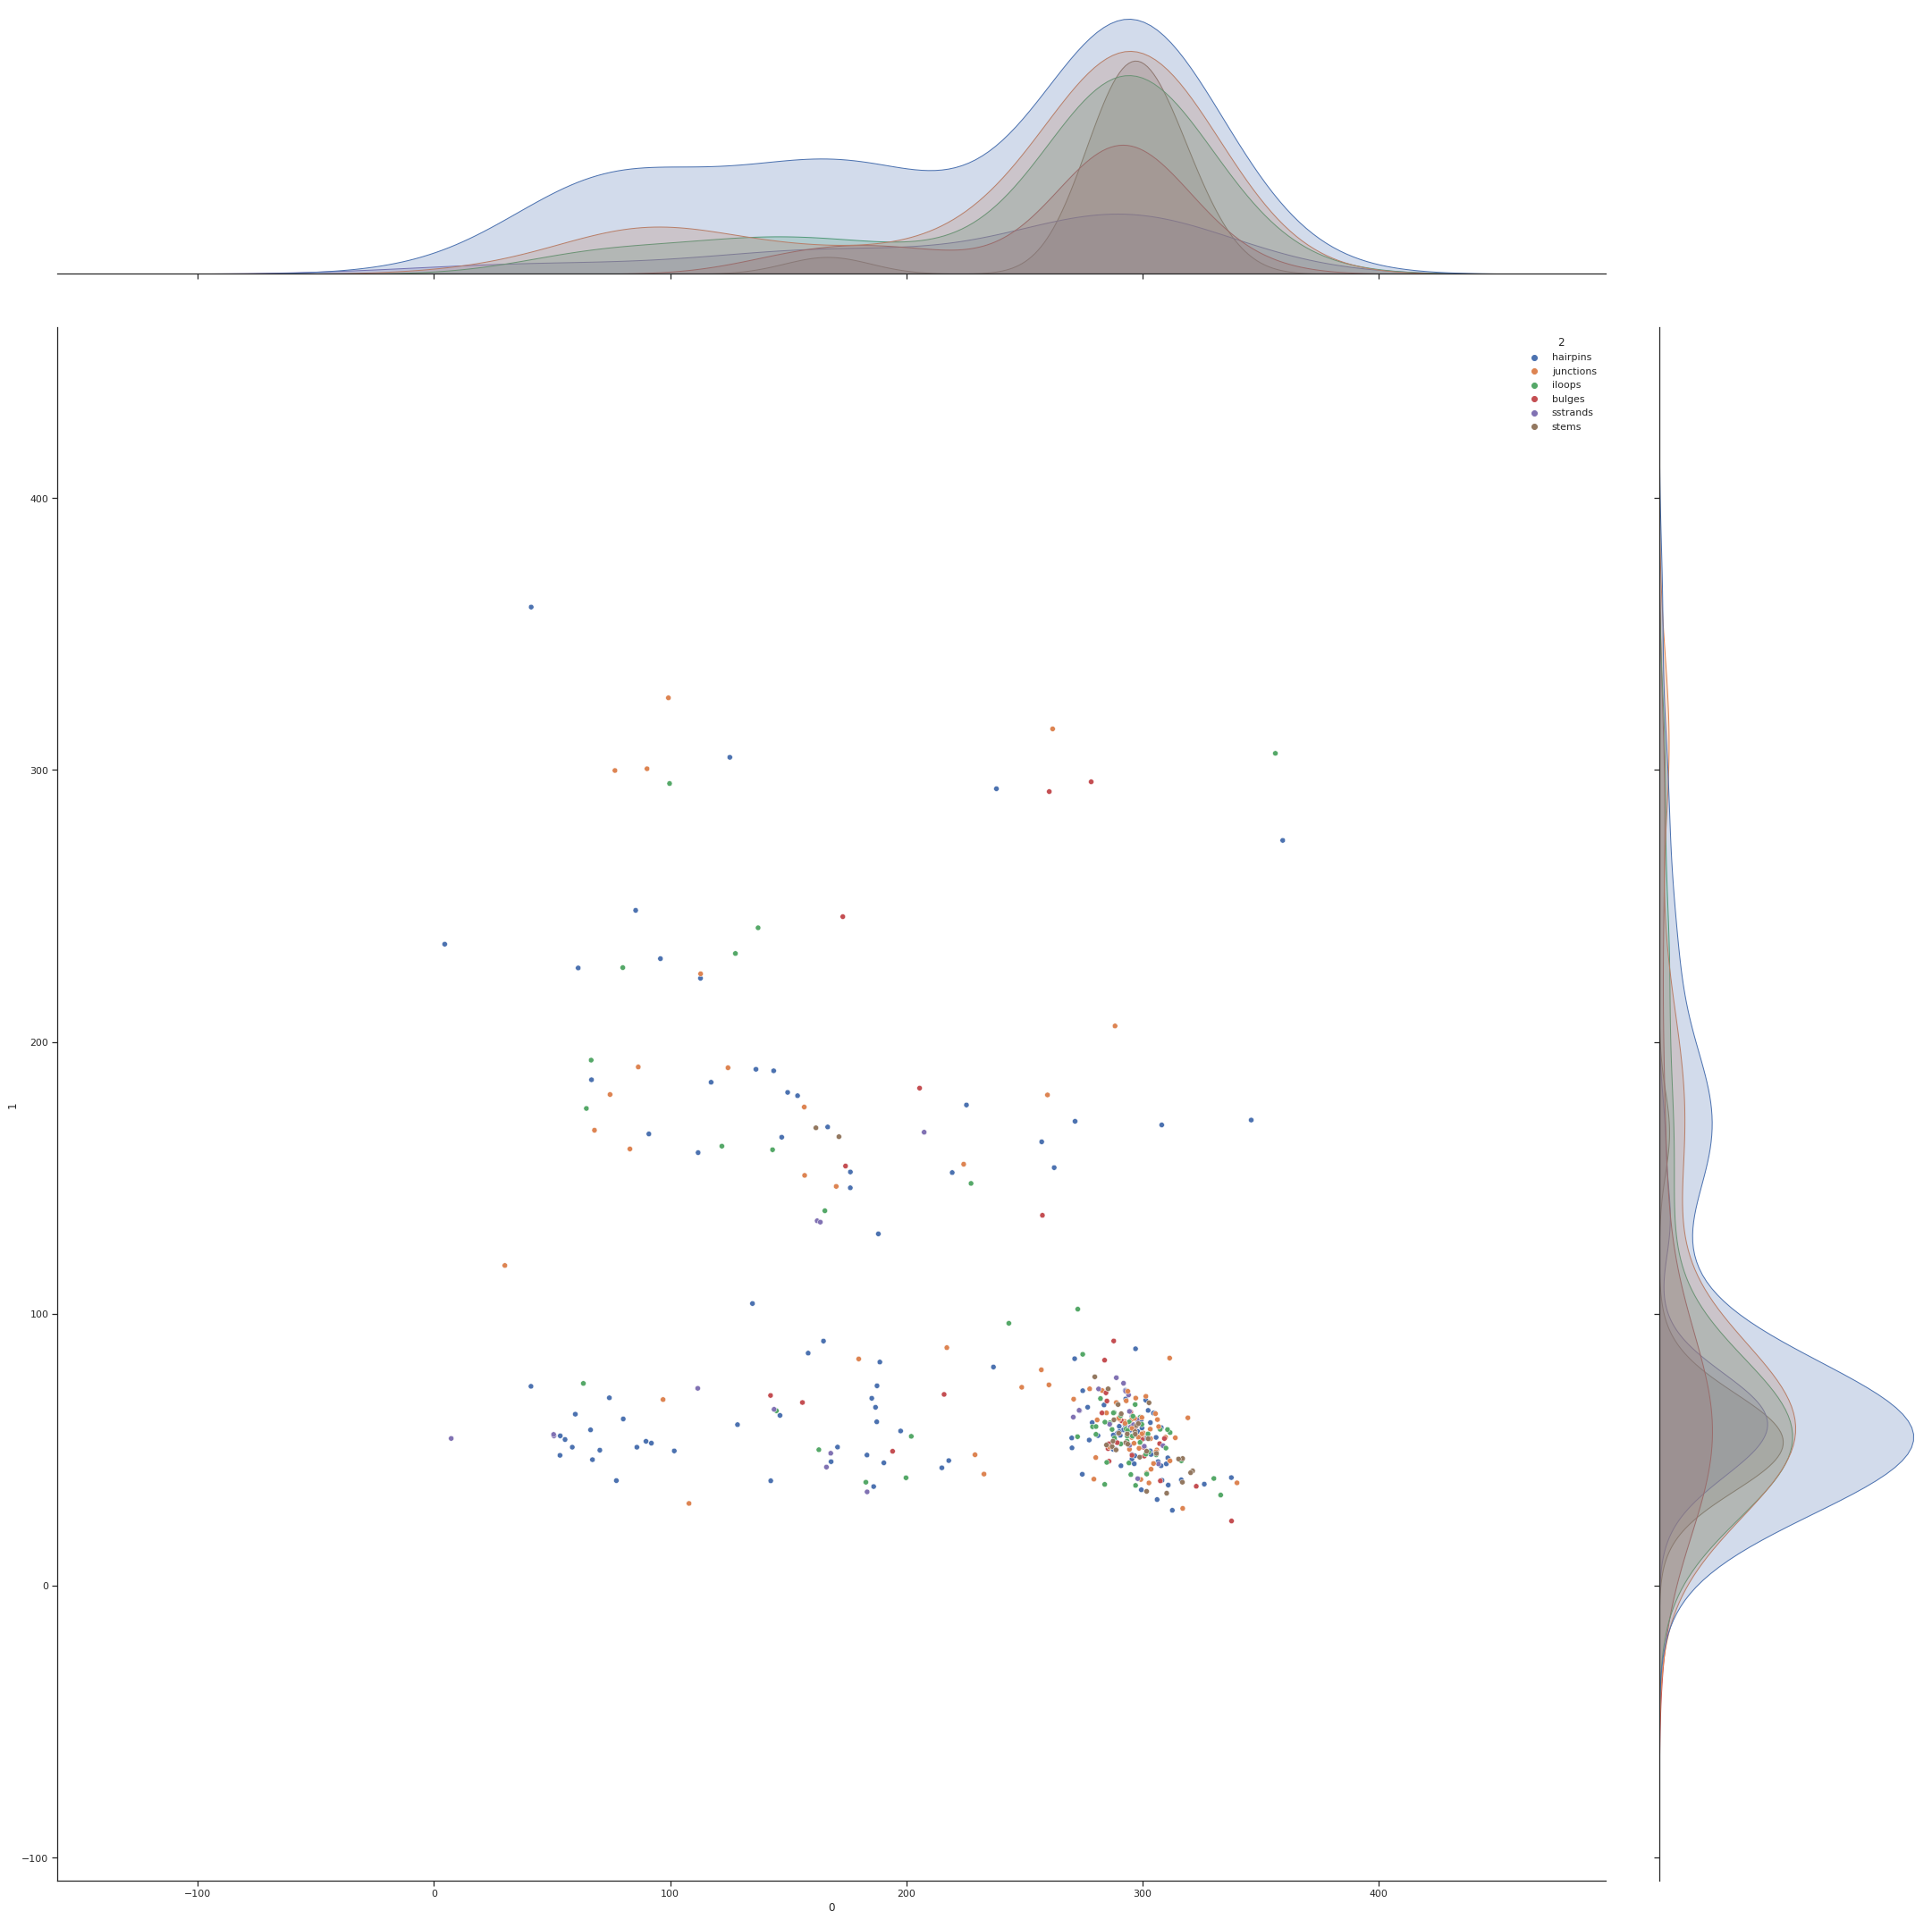

In [62]:
import seaborn as sns
sns.set_theme(style="ticks")

# Load the penguins dataset

# Show the joint distribution using kernel density estimation
g = sns.jointplot(data=df, kind="scatter", x=df[0], y=df[1] , hue=2, height=30, )


In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

ax = df2
print(df2.head)
sns.pairplot(ax, hue=0, plot_kws={"s": 10})


<bound method NDFrame.head of             0        1         2
0    142.5705  38.5744  hairpins
1    281.0795  55.1900  hairpins
2    101.7282  49.5604  hairpins
3     59.8472  63.0699  hairpins
4    296.4381  44.8293  hairpins
..        ...      ...       ...
347  284.6841  51.7468     stems
348  288.7241  49.9322     stems
349  320.2972  41.5520     stems
350  302.6805  67.2658     stems
351  293.6837  52.0663     stems

[352 rows x 3 columns]>


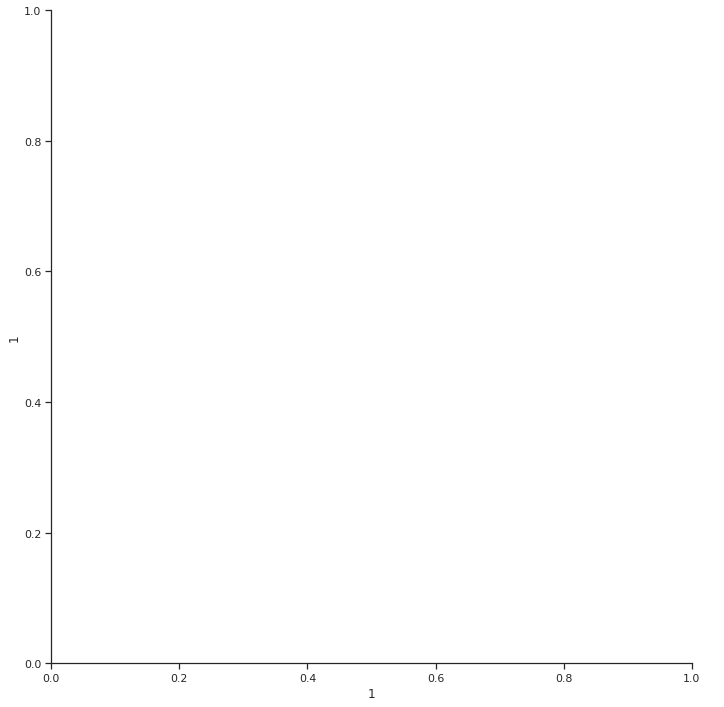

In [68]:
import seaborn as sns
sns.set_theme(style="ticks")

ax = df
print(df.head)

#sns.pairplot(ax, hue=0, height=10, plot_kws={"s": 20})
sns.pairplot(ax,  hue=0, height=10, plot_kws={"s": 20}, kind="kde")

#g=sns.pairplot(ax, diag_kind="kde", hue=0, plot_kws={"s": 10})
#g.map_lower(sns.kdeplot, levels=4, color=".2")


<bound method NDFrame.head of     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1  

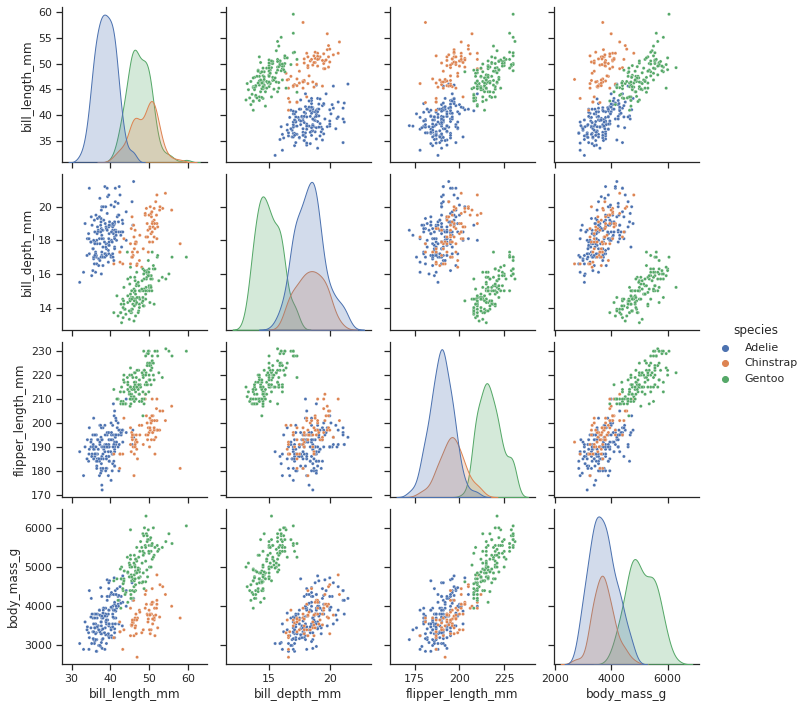

In [67]:
import seaborn as sns
sns.set_theme(style="ticks")

#ax= df 
ax = sns.load_dataset("penguins")
print(ax.head)


sns.pairplot(ax, hue="species", plot_kws={"s": 10})